# Indicators tests

In [8]:
import load_stl
import meshio
import os.path
import sys
import vtk
from vtk.util.numpy_support import vtk_to_numpy
import numpy as np
import basic_functions as bf
import test_image_ellipsoid as tie
import bounding_box as bbox
import plot
import included_ellipsoid as ie
import bounding_ellipsoid as be
import scipy as scipy
from scipy import optimize
from scipy.optimize import minimize
from scipy.special import ellipkinc, ellipeinc
from importlib import reload
import indicators_calculation as ic

## 1) Load aggregate

In [6]:
load_stl.load_aggregate('\\Users\\DFSCHMIDT\\Documents\\Python_Scripts\\PJ1_roi#1_aggregate1_stlascii.stl')

Number of points: 359408
Number of elements:
  triangle: 718812

In [9]:
reader = vtk.vtkGenericDataObjectReader()
reader.SetFileName('PJ1_roi#1_aggregate1_stlascii.vtk')
reader.Update()

aggregate_coord = np.array(reader.GetOutput().GetPoints().GetData())
print(aggregate_coord)
aggregate_coord = aggregate_coord - bf.compute_center(aggregate_coord)

[[18.706585 17.56197  14.205466]
 [18.693296 17.572308 14.205466]
 [18.706585 17.572308 14.202589]
 ...
 [16.906143 17.986408 19.336992]
 [16.924149 17.986408 19.337343]
 [16.942152 17.986408 19.33699 ]]


In [ ]:
print(aggregate_coord.shape)

## 2) Bounding box

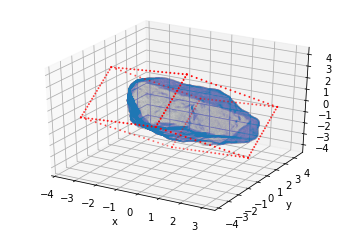

In [10]:
reload(plot)
bbox_aggregate = bbox.bbox_optim(aggregate_coord)
plot.bbox_plot(aggregate_coord, bbox_aggregate)

In [11]:
print(bbox_aggregate)

{'angles': array([0.78982553, 0.4354449 ]), 'volume': 115.55296375226389}


## 3) Bounding ellipsoid

In [12]:
bounding_ellipsoid = be.bounding_ellipsoid_optim(aggregate_coord)

In [13]:
print(bounding_ellipsoid)

{'volume': 133.48877214467055, 'a': 3.0593521022112915, 'b': 2.7189183698811714, 'c': 3.831161829328206, 'bbox': {'angles': array([0.78982553, 0.4354449 ]), 'volume': 115.55296375226389}}


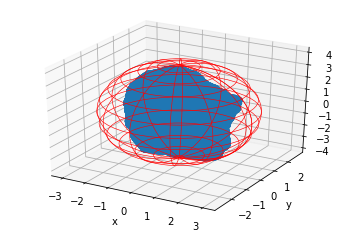

In [14]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=bounding_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, bounding_ellipsoid)

## 4) Included ellipsoid

In [15]:
included_ellipsoid = ie.included_ellipsoid_optim(aggregate_coord, 1e-3)

In [16]:
print(included_ellipsoid)

{'volume': 13.398403862906811, 'a': 1.4217794683247198, 'b': 1.2635689470178495, 'c': 1.7804643096919417, 'bbox': {'angles': array([0.78982553, 0.4354449 ]), 'volume': 115.55296375226389}}


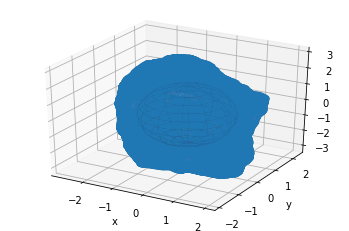

In [17]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=included_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, included_ellipsoid)

## 5) Middle ellipsoid

In [19]:
reload(bf)

<module 'basic_functions' from 'C:\\Users\\DFSCHMIDT\\Documents\\Python_Scripts\\basic_functions.py'>

In [20]:
middle_ellipsoid = bf.mid_ellipsoid(bounding_ellipsoid, included_ellipsoid)

In [21]:
print(middle_ellipsoid)

{'volume': 52.435987179485245, 'a': 2.2405657852680054, 'b': 1.9912436584495103, 'c': 2.805813069510074}


## 6) Roughness Map

In [53]:
reload(ic)

<module 'indicators_calculation' from 'C:\\Users\\DFSCHMIDT\\Documents\\Python_Scripts\\indicators_calculation.py'>

In [42]:
center = bf.compute_center(aggregate_coord)
print(center)

[ 1.32570679e-12  1.06172148e-12 -5.56078038e-12]


C:\Users\DFSCHMIDT\Documents\Python_Scripts\plot.py:207: RuntimeWarning: invalid value encountered in less
  zi[(zi<zmin) | (zi>zmax)] = None
C:\Users\DFSCHMIDT\Documents\Python_Scripts\plot.py:207: RuntimeWarning: invalid value encountered in greater
  zi[(zi<zmin) | (zi>zmax)] = None


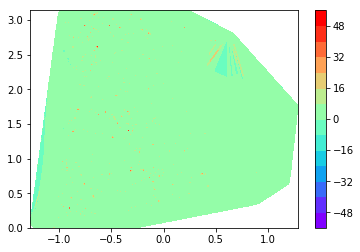

In [59]:
reload(plot)
plot.roughness_map_plot(aggregate_coord, middle_ellipsoid)

AttributeError: 'QuadContourSet' object has no attribute 'set_xlim'

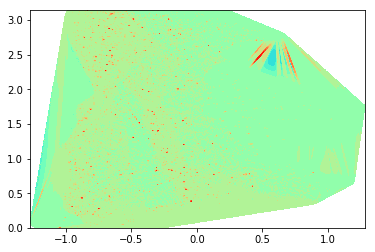

In [61]:
reload(plot)
plot.roughness_map_plot(aggregate_coord, middle_ellipsoid)

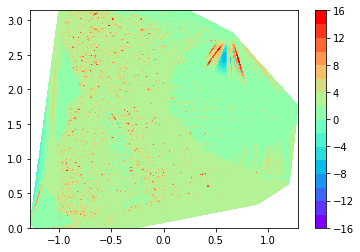

In [62]:
reload(plot)
plot.roughness_map_plot(aggregate_coord, middle_ellipsoid)

In [ ]:
reload(plot)
plot.roughness_map_plot(aggregate_coord, middle_ellipsoid)

In [33]:
be_ie_ratio = ic.be_ie_surface_ratio(bounding_ellipsoid, included_ellipsoid)
print(be_ie_ratio)

4.630143480420316
